# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [11]:
import numpy as np
import pandas as pd
import difflib
import cleaners
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline
state_mapping = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
}

threshold= 0.75     # Treshold for the match ratio

mappings = {
    "education": {"Bachelors": "Bachelor", "High School": "High School", "Doctorate": "Doctorate"},
    "customer_lifetime_value": {"%": ""},
    "vehicle_class": {"Sports Car": "Luxury", "Luxury SUV": "Luxury", "Luxury Car": "Luxury"}
}

#read data
file_path="marketing_customer_analysis.csv"

with open(file_path, "r") as file:
    dfq=pd.read_csv(file)
display(dfq.shape)
dfq.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
#drop by "Customer"
dfq=cleaners.drop_null_by_column(dfq, ["Customer","Customer Lifetime Value"])
dfq.shape

(9134, 24)

In [17]:
#here we standardize column names
dfq=cleaners.cols_names(dfq, "st","state") 
dfq.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
#fix genders
dfq=cleaners.genders(dfq)
dfq=cleaners.fix_abbreviations(dfq, state_mapping, "state", 0.7)
dfq.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,WA,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,AZ,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,NV,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,CA,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,WA,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [22]:
#standardize values for education, cars...
dfq=cleaners.standardize_column_values(dfq, mappings)
dfq.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,WA,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,AZ,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,NV,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,CA,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,WA,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [27]:
#duplicates dealing
duplicate_rows = dfq[dfq.duplicated()]

# Display the duplicate rows
print(duplicate_rows)
dfq.drop_duplicates(subset=['customer'],keep='first',inplace=True)
display(dfq.shape, dfq.head())

duplicate_rows = dfdups[dfdups.duplicated()]

# Display the duplicate rows
display(duplicate_rows, dfq.shape, dfq.head())

Empty DataFrame
Columns: [customer, state, customer_lifetime_value, response, coverage, education, effective_to_date, employmentstatus, gender, income, location_code, marital_status, monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies, policy_type, policy, renew_offer_type, sales_channel, total_claim_amount, vehicle_class, vehicle_size]
Index: []

[0 rows x 24 columns]


(9134, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,WA,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,AZ,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,NV,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,CA,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,WA,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


(9134, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,WA,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,AZ,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,NV,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,CA,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,WA,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [28]:
"""#fix policies
import numpy as np

df=df.dropna(subset=['customer_lifetime_value'])
#df=df.dropna(subset=['number_of_open_complaints'])
df['customer_lifetime_value'] = df['customer_lifetime_value'].astype('float')

# Convert number_of_open_complaints to string and fill NaN with "0/0/0"
df['number_of_open_complaints'] = df['number_of_open_complaints'].astype(str)
df['number_of_open_complaints'].fillna("0/0/0", inplace=True)

# Extract the middle value from the "number_of_open_complaints" column
df['number_of_open_complaints'] = df['number_of_open_complaints'].str.split('/').str[1]

# Convert the middle value to integers, treating "NaN" as 0
df['number_of_open_complaints'] = pd.to_numeric(data['number_of_open_complaints'], errors='coerce').fillna(0).astype(int)
# Convert the middle value to numeric (float), treating "NaN" as NaN
df['number_of_open_complaints'] = pd.to_numeric(data['number_of_open_complaints'], errors='coerce')

# Convert the numeric values to integers, treating NaN as 0
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0).astype(int)

# Convert the middle value to integer, treating "NaN" as 0
#data['number_of_open_complaints'] = data['number_of_open_complaints'].apply(lambda x: int(x) if x.isdigit() else 0)

display(df)"""

'#fix policies\nimport numpy as np\n\ndf=df.dropna(subset=[\'customer_lifetime_value\'])\n#df=df.dropna(subset=[\'number_of_open_complaints\'])\ndf[\'customer_lifetime_value\'] = df[\'customer_lifetime_value\'].astype(\'float\')\n\n# Convert number_of_open_complaints to string and fill NaN with "0/0/0"\ndf[\'number_of_open_complaints\'] = df[\'number_of_open_complaints\'].astype(str)\ndf[\'number_of_open_complaints\'].fillna("0/0/0", inplace=True)\n\n# Extract the middle value from the "number_of_open_complaints" column\ndf[\'number_of_open_complaints\'] = df[\'number_of_open_complaints\'].str.split(\'/\').str[1]\n\n# Convert the middle value to integers, treating "NaN" as 0\ndf[\'number_of_open_complaints\'] = pd.to_numeric(data[\'number_of_open_complaints\'], errors=\'coerce\').fillna(0).astype(int)\n# Convert the middle value to numeric (float), treating "NaN" as NaN\ndf[\'number_of_open_complaints\'] = pd.to_numeric(data[\'number_of_open_complaints\'], errors=\'coerce\')\n\n# Conve

In [29]:
dfq.groupby("sales_channel").agg({"total_claim_amount":"sum"})

,total_claim_amount
sales_channel,
Agent,1.524437e+06
Branch,1.111169e+06
Call Center,7.556400e+05
Web,5.737207e+05


In [30]:
dfq.groupby(["state", "sales_channel"])["total_claim_amount"].sum()

state  sales_channel
AZ     Agent            279406.220733
       Branch           193723.576516
       Call Center      147635.440826
       Web              103625.305069
CA     Agent            532881.732737
       Branch           402141.638622
       Call Center      256429.433514
       Web              187677.888730
NV     Agent            149073.725806
       Branch           101883.331522
       Call Center       76727.514804
       Web               59293.427491
OR     Agent            430809.125874
       Branch           306942.388972
       Call Center      211509.966478
       Web              177004.140200
WA     Agent            132266.552992
       Branch           106478.140138
       Call Center       63337.605541
       Web               46119.890689
Name: total_claim_amount, dtype: float64

In [31]:
pivot = dfq.pivot_table(
    values='customer_lifetime_value',
    index=['gender', 'education'],
    aggfunc="mean"
)

print(pivot)

                             customer_lifetime_value
gender education                                    
F      Bachelor                          8012.877921
       College                           7732.833339
       Doctor                            7423.630380
       High School or Below              8578.995840
       Master                            8319.111562
M      Bachelor                          7722.072099
       College                           7971.342089
       Doctor                            7614.823122
       High School or Below              8010.082690
       Master                            8158.078485


In [34]:
dfq['gender'].unique()

array(['F', 'M'], dtype=object)

In [35]:
dfq.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
#show a Plot of the total Nr of ressources


2. Using the original dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [37]:
if "unnamed:_0" in dfq.columns:
    dfqq = df.drop(columns=["unnamed:_0"])

dfq.reset_index()

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,BU79786,WA,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,AZ,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,NV,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,CA,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,WA,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,LA72316,CA,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,PK87824,CA,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,TD14365,CA,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,UP19263,CA,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [68]:
# Convert the numeric values to integers, treating NaN as 0
df['state'] = df['state'].fillna("NaN").astype(str) #to fix strange TypeError
df=cleaners.fix_abbreviations(df, state_mapping, "state", 0.7)
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,AZ,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,CA,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,WA,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,OR,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,OR,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [38]:
#customerlife_time fixing
dfq.dropna(subset=['customer_lifetime_value'],inplace=True)
#df=df.dropna(subset=['number_of_open_complaints'])
dfq['customer_lifetime_value'] = dfq['customer_lifetime_value'].astype('float')

display(dfq.shape, dfq.head())

(9134, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,WA,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,AZ,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,NV,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,CA,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,WA,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [40]:
#customers per state
customers_per_state = dfq.groupby("state")["customer"].nunique()
print(customers_per_state)

state
AZ    1703
CA    3150
NV     882
OR    2601
WA     798
Name: customer, dtype: int64


In [41]:
#filter states with > 500 customers
over500 = customers_per_state[customers_per_state > 500]
over500=over500.sort_values(ascending=False) # sorting by number 
print(over500)
#sorting by states alphabetically

over500_sorted = over500.sort_index()
print(over500_sorted)

state
CA    3150
OR    2601
AZ    1703
NV     882
WA     798
Name: customer, dtype: int64
state
AZ    1703
CA    3150
NV     882
OR    2601
WA     798
Name: customer, dtype: int64


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [42]:
# Group by 'education_level' and 'gender' and calculate the max, min, and median customer lifetime values
agg_df = dfq.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median']).astype("int")#round(0)

print(agg_df)

                               max   min  median
education            gender                     
Bachelor             F       73225  1904    5678
                     M       67907  1898    5555
College              F       61850  1898    5621
                     M       61134  1918    5989
Doctor               F       44856  2395    5332
                     M       32677  2267    5620
High School or Below F       55277  2144    6044
                     M       83325  1940    6176
Master               F       51016  2417    5801
                     M       50568  2272    5617


In [43]:
#sort by median
agg_df_sorted = agg_df.sort_values(by='median', ascending=False)
print(agg_df_sorted)

#sort by gender
#agg_df_sorted = agg_df.sort_index(1)
agg_df_sorted = agg_df.sort_values(by=['gender', 'median'], ascending=[True, False])
print(agg_df_sorted)


                               max   min  median
education            gender                     
High School or Below M       83325  1940    6176
                     F       55277  2144    6044
College              M       61134  1918    5989
Master               F       51016  2417    5801
Bachelor             F       73225  1904    5678
College              F       61850  1898    5621
Doctor               M       32677  2267    5620
Master               M       50568  2272    5617
Bachelor             M       67907  1898    5555
Doctor               F       44856  2395    5332
                               max   min  median
education            gender                     
High School or Below F       55277  2144    6044
Master               F       51016  2417    5801
Bachelor             F       73225  1904    5678
College              F       61850  1898    5621
Doctor               F       44856  2395    5332
High School or Below M       83325  1940    6176
College             

In [44]:
type(agg_df)
agg_df.groupby("gender")["median"].agg("sum")


gender
F    28476
M    28957
Name: median, dtype: int32

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [66]:
# your code goes here

Lab: Customer Analysis Round 3:

Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

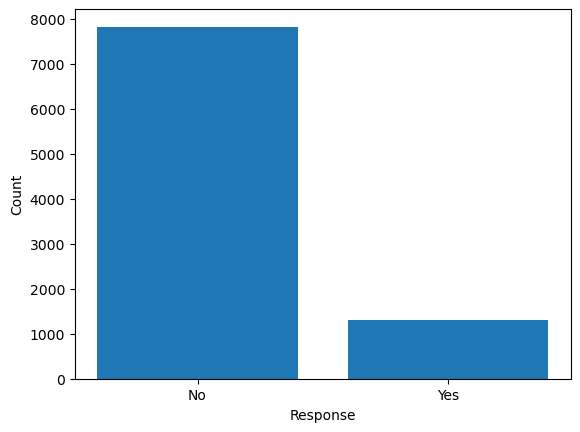

In [46]:
#Show a plot of the total number of responses
fig, ax = plt.subplots()
ax.bar(x = dfq['response'].value_counts().index, height = dfq['response'].value_counts().values)
ax.set_xlabel("Response")
ax.set_ylabel("Count")
plt.show()

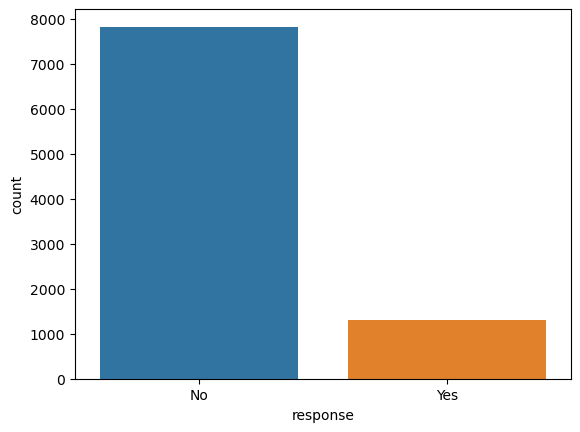

In [48]:
#seaborn
fig, ax = plt.subplots()
sns.countplot(data=dfq, x="response", ax = ax)
plt.show()

<Axes: xlabel='sales_channel', ylabel='count'>

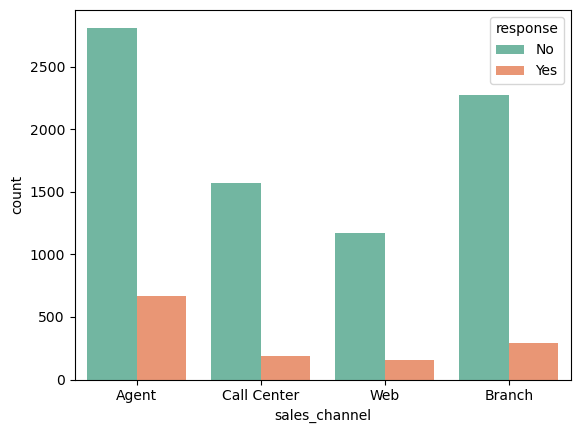

In [59]:
#Show a plot of the response rate by the sales channel.
sns.countplot(data=dfq, x='sales_channel', hue='response', palette='Set2')

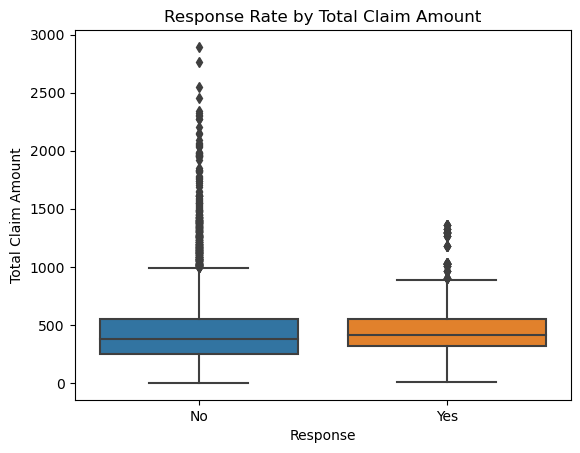

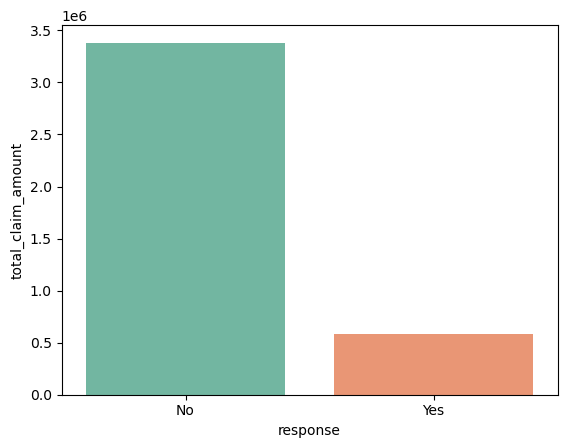

In [80]:
#Show a plot of the response rate by the total claim amount.
sns.boxplot(data=dfq, x='response', y='total_claim_amount')
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Response')
plt.ylabel('Total Claim Amount')
plt.show()

# Calculate the average total claim amount for each response category
dfq['response'] = dfq['response'].astype('category')
dfq['total_claim_amount'] = dfq['total_claim_amount'].astype('float')
claim_by_response = dfq.groupby('response')['total_claim_amount'].sum().reset_index()
claim_by_response
sns.barplot(data=claim_by_response, x='response', y='total_claim_amount', palette='Set2')
plt.show()

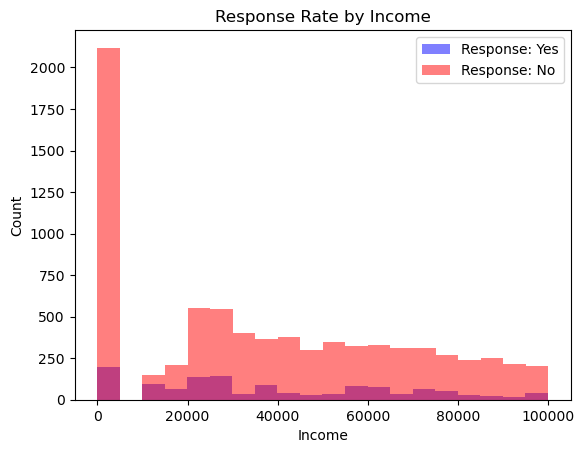

In [81]:
#Show a plot of the response rate by income.
plt.hist(dfq[dfq['response'] == 'Yes']['income'], bins=20, alpha=0.5, label='Response: Yes', color='blue')

# Create a histogram of income for customers with 'response' equal to 'No'
plt.hist(dfq[dfq['response'] == 'No']['income'], bins=20, alpha=0.5, label='Response: No', color='red')

plt.title('Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.show()

In [82]:
dfq.to_csv(file_path, index=False)

# Lab | Data Transformations


In today's lesson, we talked about continuous distributions (mainly normal distribution), linear regression, and how multicollinearity can impact the model. In this lab, we will test your knowledge of those things using the marketing_customer_analysis.csv file. You can continue using the same Jupyter file. The file can be found in the files_for_lab folder.

Get the data
Use the Jupyter file from the last lab (Customer Analysis Round 3)

Complete the following task
#1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

Now we will try to check the normality of the numerical variables visually
#2.Use seaborn library to construct distribution plots for the numerical variables
#3.Use Matplotlib to construct histograms
#4.Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
#5.For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
#6.If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
#7.Plot the heatmap of the correlation matrix after the filtering.

In [87]:
#1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
numerical = dfq.select_dtypes(include=[np.number])

# Select categorical columns
categoricals = dfq.select_dtypes(include=[np.object_])

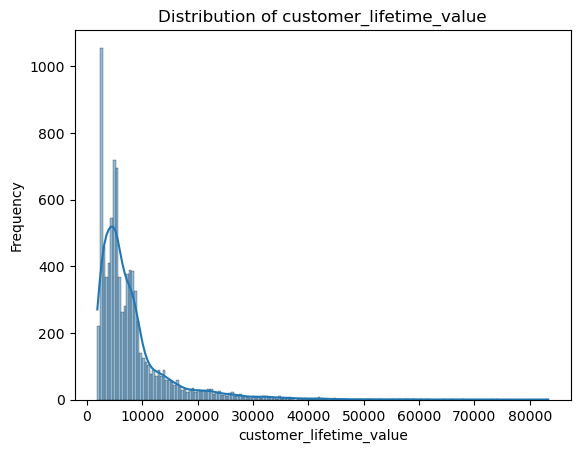

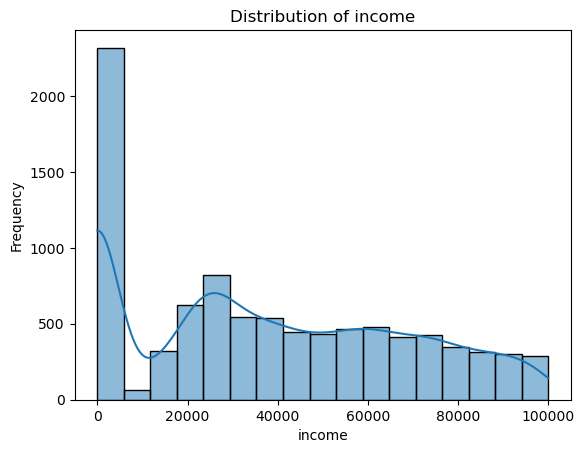

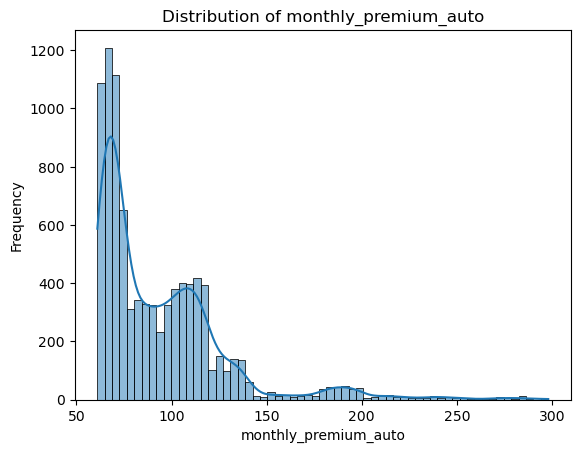

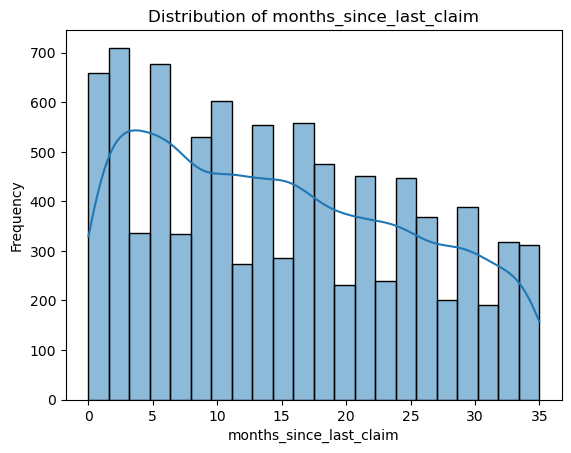

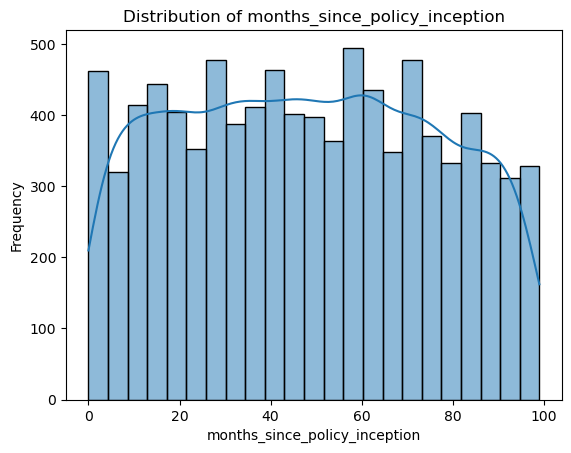

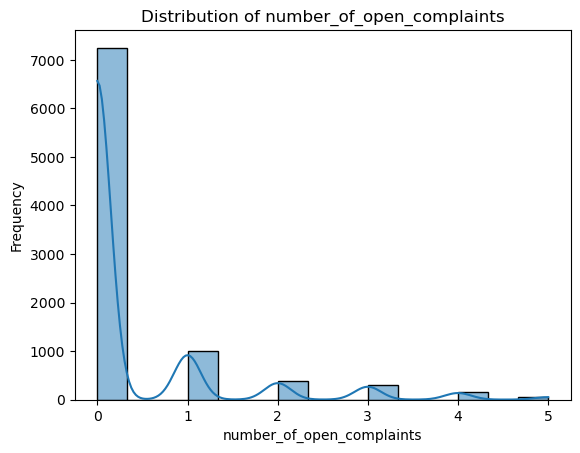

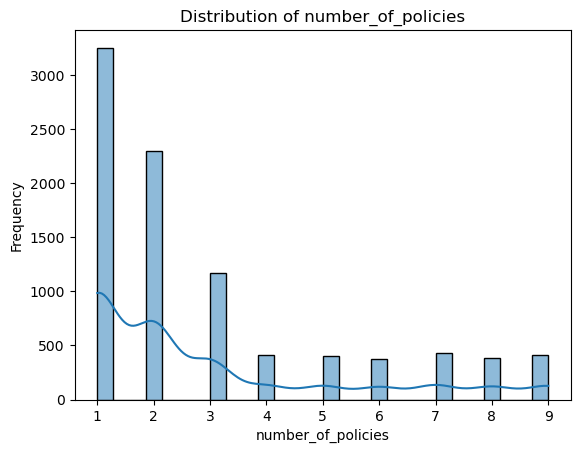

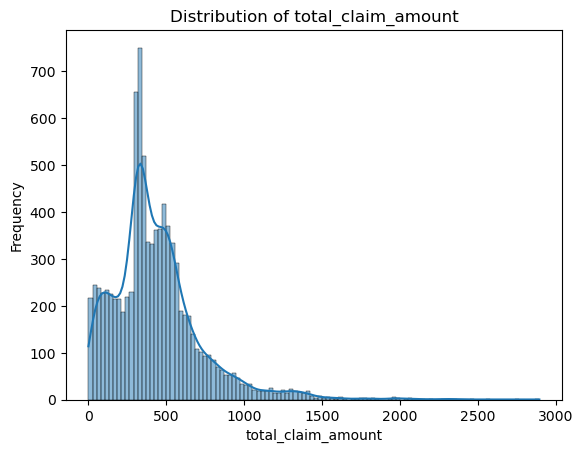

In [88]:
#2.
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numerical' is your DataFrame containing numerical variables

# Loop through each numerical column and create distribution plots
for col in numerical.columns:
    sns.histplot(numerical[col], kde=True)  # Create a histogram with a kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

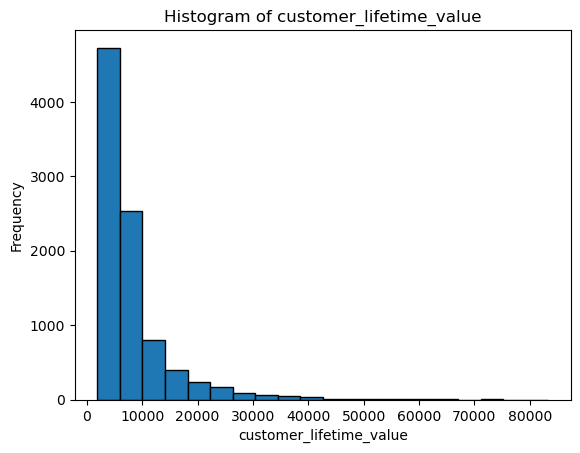

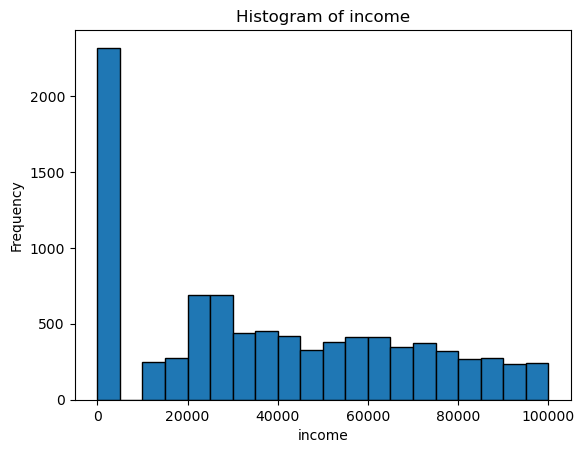

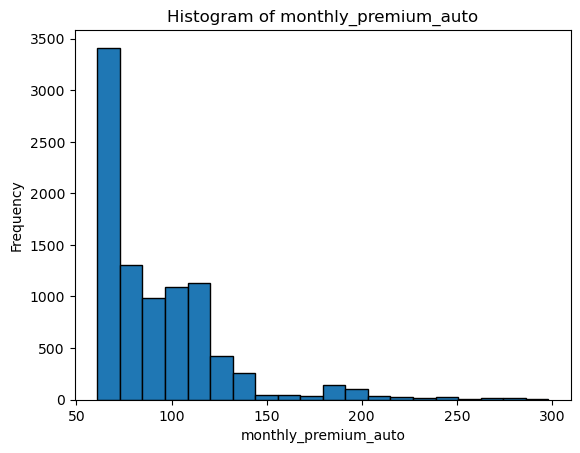

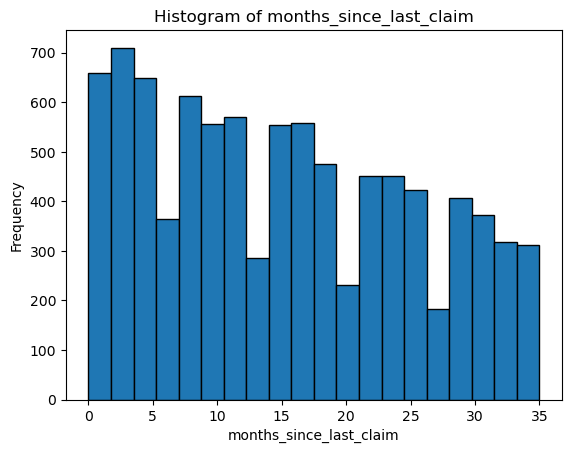

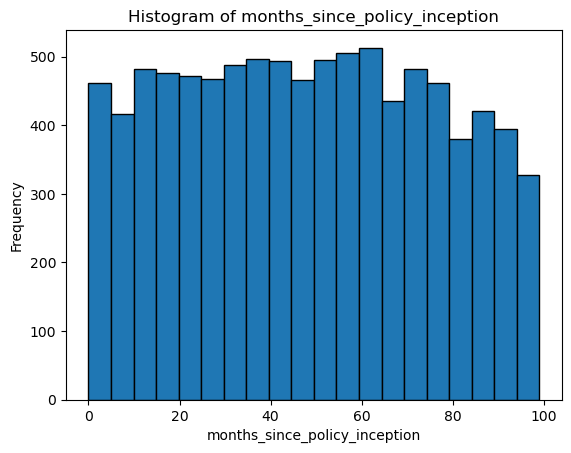

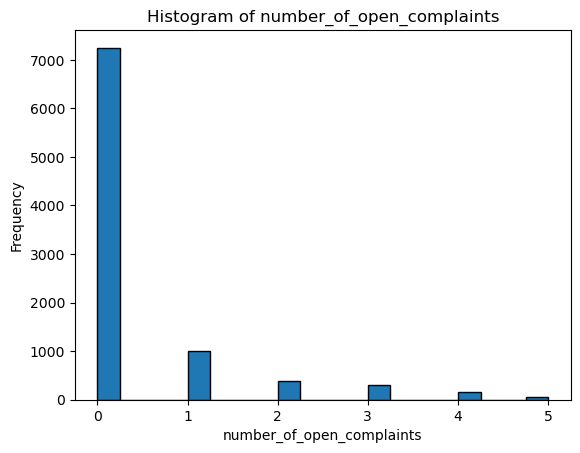

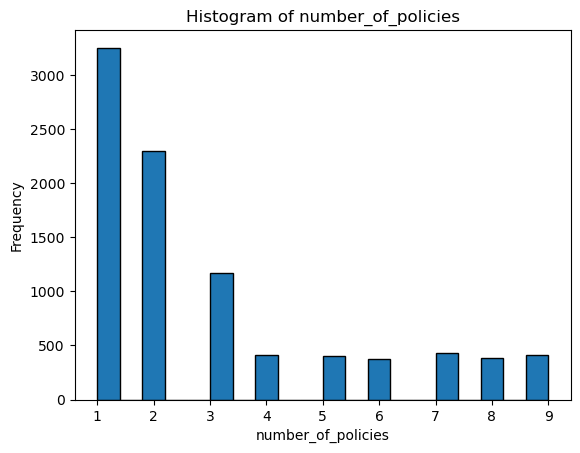

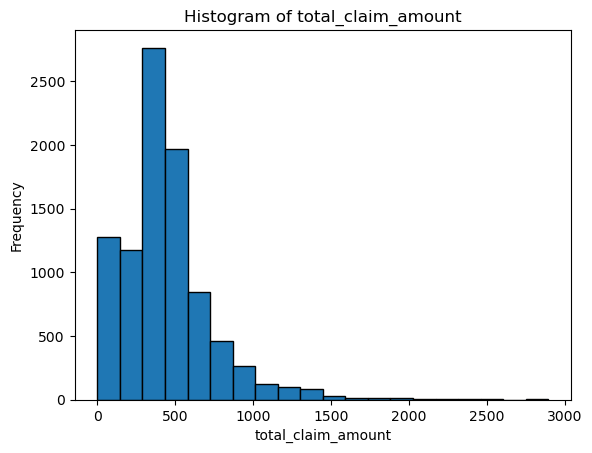

In [89]:
#3.
for col in numerical.columns:
    plt.hist(numerical[col], bins=20, edgecolor='k')  # Create a histogram with 20 bins and black edges
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [90]:
#4.
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Standardize the numerical variables
scaler = StandardScaler()
numerical_standardized = scaler.fit_transform(numerical)

# Compute the skewness for each std variable
skewness_results = {}
for i, col in enumerate(numerical.columns):
    skewness = stats.skew(numerical_standardized[:, i], nan_policy='omit')  # Omit NaN values
    skewness_results[col] = skewness

# Print 'em skewness'
for col, skew in skewness_results.items():
    print(f"Skewness of '{col}': {skew:.2f}")


Skewness of 'customer_lifetime_value': 3.03
Skewness of 'income': 0.29
Skewness of 'monthly_premium_auto': 2.12
Skewness of 'months_since_last_claim': 0.28
Skewness of 'months_since_policy_inception': 0.04
Skewness of 'number_of_open_complaints': 2.78
Skewness of 'number_of_policies': 1.25
Skewness of 'total_claim_amount': 1.71


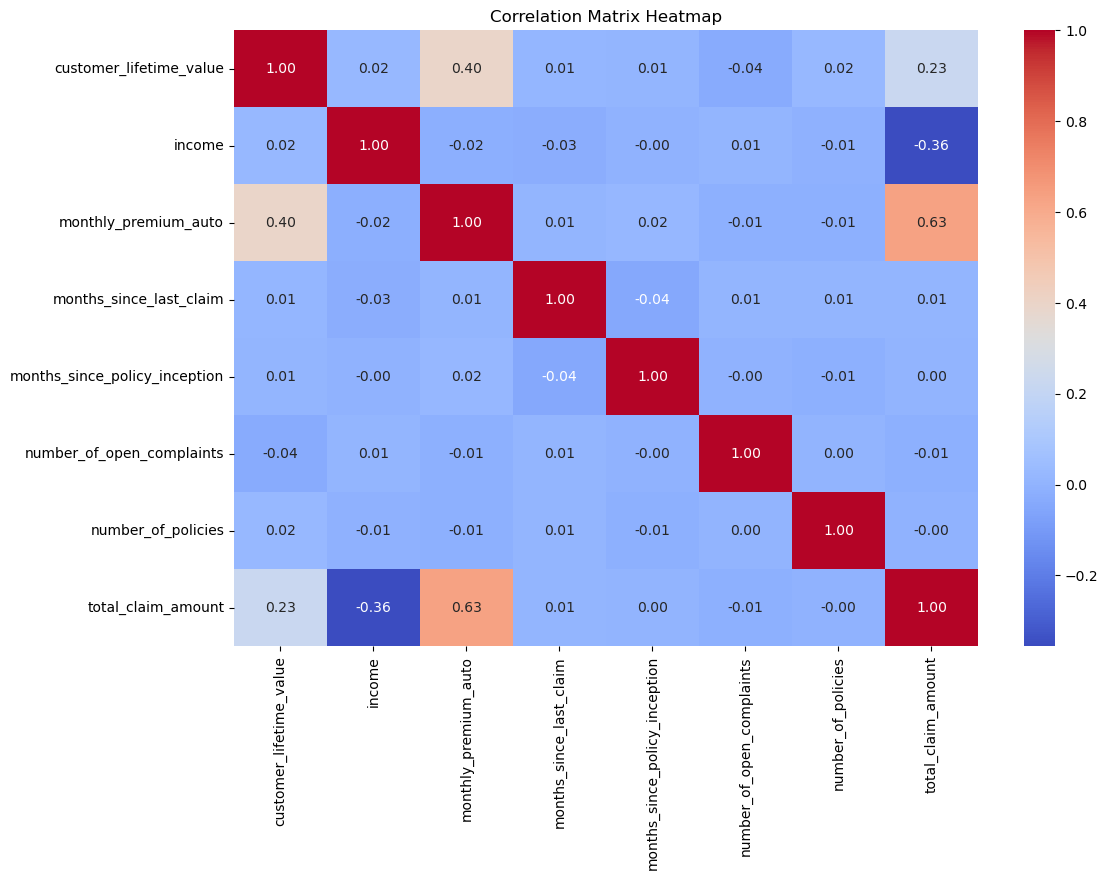

In [91]:
#5.
correlation_matrix = numerical.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#6.
